# Introduction - Deep Learning

Classical programming is all about creating a function that helps us to process input data and get the desired output.

In the learning paradigm, we change the process so that given a set of examples of input data and desired output, we aim to learn the function that can process the data.

- In machine learning, we end up handcrafting the features and then learn the function to get the desired output
- In deep learning, we want to both learn the features and the function together to get the desired output

![Learning Paradigm](img/learning_paradigm.png)

# Theory of Deep Learning

We will start with why deep learning works and explain the basis of Universal Approximation

Let us take a non-linear function - a saddle function

$$ Z = 2X^2 - 3Y^2  + 1 + \epsilon $$

## Problem: A Noisy Function

In [482]:
# DL & Numerical Library
import numpy as np
import keras

# Visualisation Library & Helpers
import matplotlib.pyplot as plt
%matplotlib inline
import vis

In [483]:
x = np.arange(-1,1,0.01)
y = np.arange(-1,1,0.01)

In [485]:
X, Y = np.meshgrid(x, y)
c = np.ones((200,200))
e = np.random.rand(200,200)*0.1

In [486]:
Z = 2*X*X - 3*Y*Y + 5*c + e

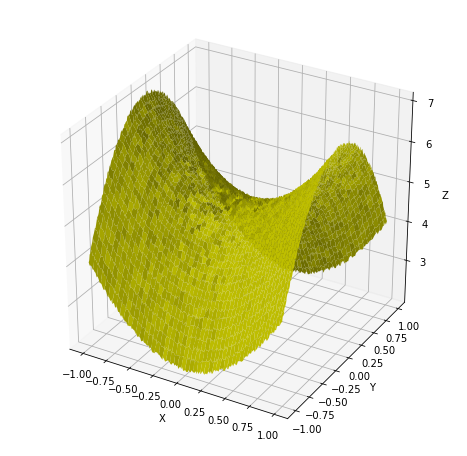

In [487]:
vis.plot3d(X,Y,Z)

## Using Neural Network

### Step 0: Load the Keras Model

In [466]:
from keras.models import Sequential
from keras.layers import Dense

### Step 1: Create the input and output

In [467]:
input_xy = np.c_[X.reshape(-1),Y.reshape(-1)]
output_z = Z.reshape(-1)

In [468]:
output_z.shape, input_xy.shape

((40000,), (40000, 2))

### Step 2: Create the Transformation & Prediction Model

In [469]:
model = Sequential()
model.add(Dense(40, input_dim=2,  activation="relu"))
model.add(Dense(1))

In [470]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 40)                120       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 41        
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


### Step 3: Compile the Model - Loss, Optimizer and Fit the Model

In [471]:
model.compile(loss='mean_squared_error', optimizer="sgd", metrics=["mse"])

In [472]:
%%time
output = model.fit(input_xy, output_z, epochs=10, validation_split=0.2, shuffle=True, verbose=0)

CPU times: user 20.3 s, sys: 2.74 s, total: 23.1 s
Wall time: 16.5 s


### Step 4: Evaluate Model Performance

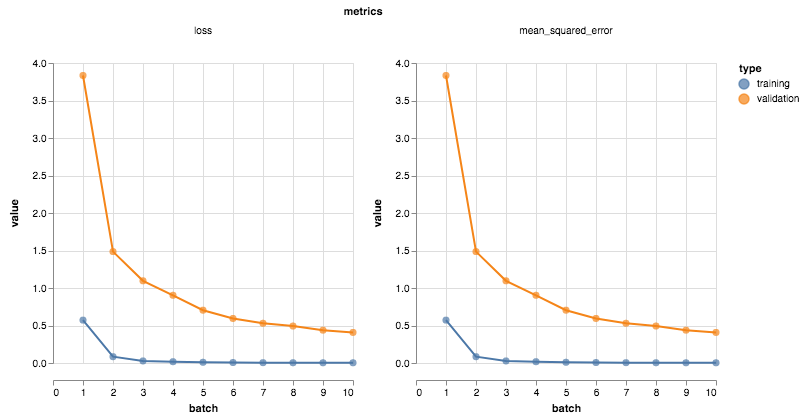

In [481]:
vis.metrics(output.history)

### Step 5: Make Prediction from the model

In [474]:
Z_pred = model.predict(input_xy).reshape(200,200)

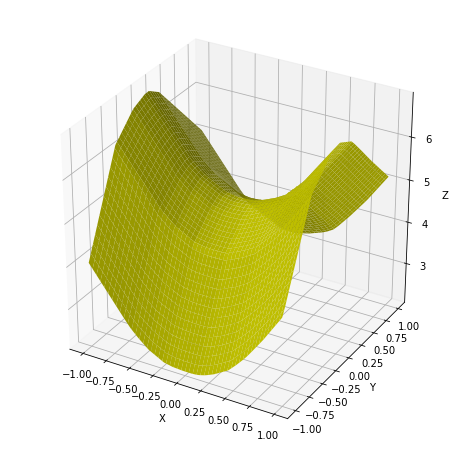

In [475]:
vis.plot3d(X,Y,Z_pred)

## Experimentation / Questions

- Try changing the activation to a "linear" and see whether you can predict the function or not 
- Try adding more layers to the network
- Try changing the number of layers in the network